In [2]:
#Importação de bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
#Importação de dados

dt2 = pd.read_csv('D:\ead_etl\dataset2.csv', sep=',')
dt2.head()

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\pvrrr\AppData\Local\Temp\ipykernel_9384\2938790932.py:3: SyntaxWarning: invalid escape sequence '\e'
  dt2 = pd.read_csv('D:\ead_etl\dataset2.csv', sep=',')


,id_paciente,data_nascimento,data_internacao,data_infeccao,tipo_infeccao,data_coleta_cultura,microorganismo,perfil_resistencia,setor_internacao
0,P001,1958-07-15,2025-07-20,2025-08-05,PAV,2025-08-06,Acinetobacter baumannii,Multirresistente,UTI Adulto
1,P002,1999-02-20,2025-07-25,2025-08-07,ITU-SVD,2025-08-07,Klebsiella pneumoniae,KPC,UTI Adulto
2,P003,1965-01-30,2025-08-01,2025-08-08,IPCSL,2025-08-08,Staphylococcus aureus,MRSA,UTI Adulto
3,P004,1943-11-12,2025-07-15,2025-08-10,PAV,2025-08-11,Pseudomonas aeruginosa,Multirresistente,UTI Adulto
4,P005,1988-09-03,2025-08-10,2025-08-18,ITU-SVD,2025-08-18,Escherichia coli,Sensível,Clínica Médica


In [4]:
#IDADE PACIENTE NO DIA DA INFECÇÃO CALCULO
dt2['data_nascimento'] = pd.to_datetime(dt2['data_nascimento'], format='%Y-%m-%d')
dt2['data_infeccao'] = pd.to_datetime(dt2['data_infeccao'], format='%Y-%m-%d')
dt2['idade_paciente'] = (dt2['data_infeccao'] - dt2['data_nascimento']).dt.days // 365
dt2.head()

,id_paciente,data_nascimento,data_internacao,data_infeccao,tipo_infeccao,data_coleta_cultura,microorganismo,perfil_resistencia,setor_internacao,idade_paciente
0,P001,1958-07-15,2025-07-20,2025-08-05,PAV,2025-08-06,Acinetobacter baumannii,Multirresistente,UTI Adulto,67
1,P002,1999-02-20,2025-07-25,2025-08-07,ITU-SVD,2025-08-07,Klebsiella pneumoniae,KPC,UTI Adulto,26
2,P003,1965-01-30,2025-08-01,2025-08-08,IPCSL,2025-08-08,Staphylococcus aureus,MRSA,UTI Adulto,60
3,P004,1943-11-12,2025-07-15,2025-08-10,PAV,2025-08-11,Pseudomonas aeruginosa,Multirresistente,UTI Adulto,81
4,P005,1988-09-03,2025-08-10,2025-08-18,ITU-SVD,2025-08-18,Escherichia coli,Sensível,Clínica Médica,36


In [5]:
#media idade dos pacietes
dt2['idade_paciente'].mean()

np.float64(54.0)

In [6]:
#mediana de idade dos pacietes
dt2['idade_paciente'].median()

np.float64(58.0)

In [7]:
#dias da coleta do exame até o resultado
dt2['data_infeccao'] = pd.to_datetime(dt2['data_infeccao'], format='%Y-%m-%d')
dt2['data_coleta_cultura'] = pd.to_datetime(dt2['data_coleta_cultura'], format='%Y-%m-%d')
dt2['dias_coleta_resultado'] = (dt2['data_coleta_cultura'] - dt2['data_infeccao']).dt.days
dt2.head()

,id_paciente,data_nascimento,data_internacao,data_infeccao,tipo_infeccao,data_coleta_cultura,microorganismo,perfil_resistencia,setor_internacao,idade_paciente,dias_coleta_resultado
0,P001,1958-07-15,2025-07-20,2025-08-05,PAV,2025-08-06,Acinetobacter baumannii,Multirresistente,UTI Adulto,67,1
1,P002,1999-02-20,2025-07-25,2025-08-07,ITU-SVD,2025-08-07,Klebsiella pneumoniae,KPC,UTI Adulto,26,0
2,P003,1965-01-30,2025-08-01,2025-08-08,IPCSL,2025-08-08,Staphylococcus aureus,MRSA,UTI Adulto,60,0
3,P004,1943-11-12,2025-07-15,2025-08-10,PAV,2025-08-11,Pseudomonas aeruginosa,Multirresistente,UTI Adulto,81,1
4,P005,1988-09-03,2025-08-10,2025-08-18,ITU-SVD,2025-08-18,Escherichia coli,Sensível,Clínica Médica,36,0


In [8]:
#tempo médio de coleta
dt2['dias_coleta_resultado'].mean()

np.float64(0.32)

In [9]:
#criação de coluna dias até a infecção
dt2['data_internacao'] = pd.to_datetime(dt2['data_internacao'], format='%Y-%m-%d')  
dt2['data_infeccao'] = pd.to_datetime(dt2['data_infeccao'], format='%Y-%m-%d')
dt2['dias_ate_infeccao'] = (dt2['data_infeccao'] - dt2['data_internacao']).dt.days
dt2.head()

,id_paciente,data_nascimento,data_internacao,data_infeccao,tipo_infeccao,data_coleta_cultura,microorganismo,perfil_resistencia,setor_internacao,idade_paciente,dias_coleta_resultado,dias_ate_infeccao
0,P001,1958-07-15,2025-07-20,2025-08-05,PAV,2025-08-06,Acinetobacter baumannii,Multirresistente,UTI Adulto,67,1,16
1,P002,1999-02-20,2025-07-25,2025-08-07,ITU-SVD,2025-08-07,Klebsiella pneumoniae,KPC,UTI Adulto,26,0,13
2,P003,1965-01-30,2025-08-01,2025-08-08,IPCSL,2025-08-08,Staphylococcus aureus,MRSA,UTI Adulto,60,0,7
3,P004,1943-11-12,2025-07-15,2025-08-10,PAV,2025-08-11,Pseudomonas aeruginosa,Multirresistente,UTI Adulto,81,1,26
4,P005,1988-09-03,2025-08-10,2025-08-18,ITU-SVD,2025-08-18,Escherichia coli,Sensível,Clínica Médica,36,0,8


In [10]:
#média dias ate a infecção
dt2['dias_ate_infeccao'].mean()

np.float64(13.76)

In [11]:
#frequencia de microorganismos
dt2['microorganismo'].value_counts()

microorganismo
Klebsiella pneumoniae         8
Staphylococcus aureus         4
Acinetobacter baumannii       3
Pseudomonas aeruginosa        3
Escherichia coli              2
Enterococcus faecalis         2
Staphylococcus epidermidis    1
Proteus mirabilis             1
Serratia marcescens           1
Name: count, dtype: int64

In [12]:
#perfil de resistência comum
dt2['perfil_resistencia'].value_counts()

perfil_resistencia
KPC                 8
Multirresistente    6
Sensível            6
MRSA                4
VRE                 1
Name: count, dtype: int64

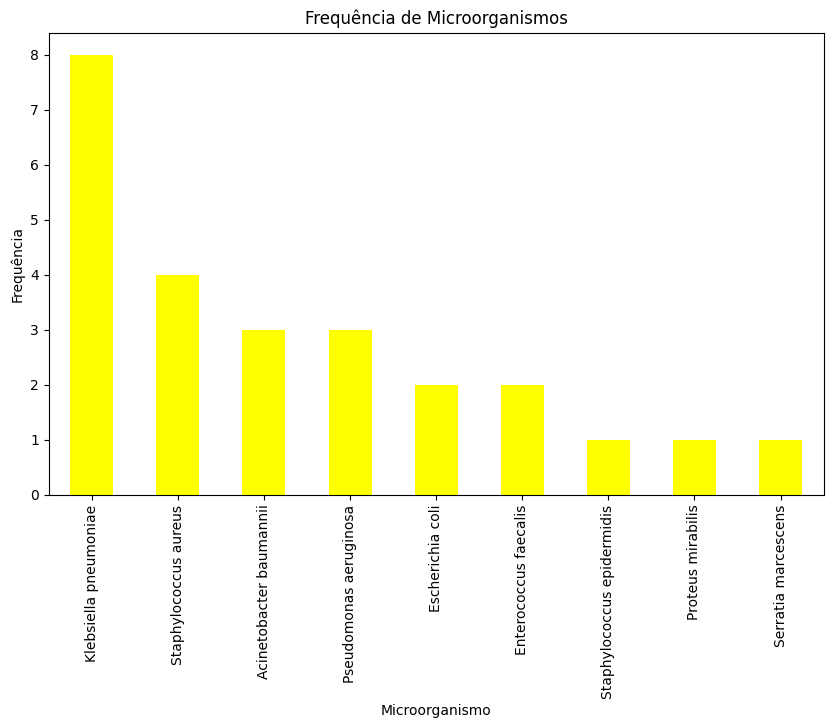

In [13]:
#grafico de barras microorganismos
plt.figure(figsize=(10, 6))
dt2['microorganismo'].value_counts().plot(kind='bar', color='yellow')
plt.xlabel('Microorganismo')
plt.ylabel('Frequência')
plt.title('Frequência de Microorganismos')
plt.show()

In [14]:
dt2['tipo_infeccao'].value_counts()

tipo_infeccao
PAV        10
ITU-SVD     9
IPCSL       6
Name: count, dtype: int64

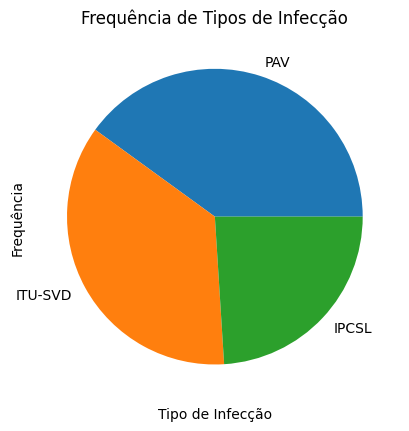

In [15]:
plt.Figure(figsize=(10, 10))
dt2['tipo_infeccao'].value_counts().plot(kind='pie', color='green')
plt.xlabel('Tipo de Infecção')  
plt.ylabel('Frequência')
plt.title('Frequência de Tipos de Infecção')
plt.show()

In [16]:
dt2['setor_internacao'].value_counts()

setor_internacao
UTI Adulto           17
Clínica Médica        4
Clínica Cirúrgica     3
UTI Pediátrica        1
Name: count, dtype: int64

In [17]:
dt2[dt2['setor_internacao'] == 'UTI Adulto']['microorganismo'].value_counts()

microorganismo
Klebsiella pneumoniae      7
Acinetobacter baumannii    3
Staphylococcus aureus      3
Pseudomonas aeruginosa     3
Enterococcus faecalis      1
Name: count, dtype: int64

<Figure size 1600x1000 with 0 Axes>

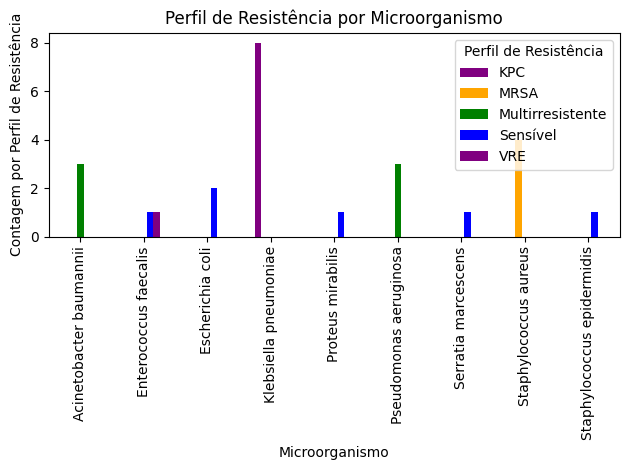

In [18]:
plt.figure(figsize=(16, 10))
dt2.groupby(['microorganismo', 'perfil_resistencia']).size().unstack(fill_value=0).plot(kind='bar', color=['purple', 'orange', 'green', 'blue'])
plt.xlabel('Microorganismo')
plt.ylabel('Contagem por Perfil de Resistência')
plt.title('Perfil de Resistência por Microorganismo')
plt.legend(title='Perfil de Resistência')
plt.tight_layout()
plt.show()

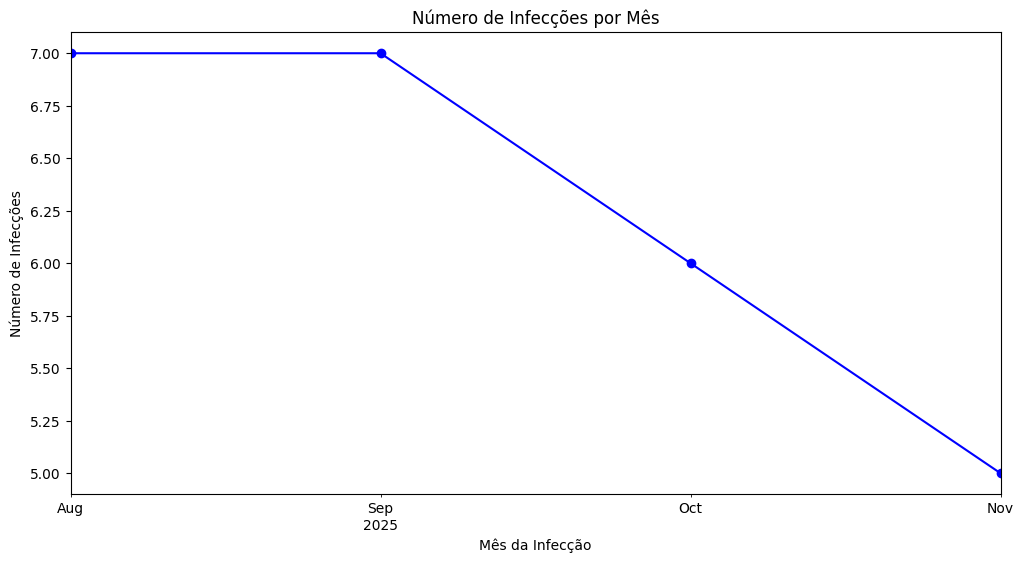

In [19]:
#agrupar infecções por mes
dt2['mes_infeccao'] = dt2['data_infeccao'].dt.to_period('M')
dt2.head()
infecoes_por_mes = dt2['mes_infeccao'].value_counts().sort_index()
infecoes_por_mes.plot(kind='line', marker='o', figsize=(12, 6), color='blue')
plt.xlabel('Mês da Infecção')           
plt.ylabel('Número de Infecções')
plt.title('Número de Infecções por Mês')
plt.show()  

In [20]:
faixas = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
dt2['grupo_idade'] = pd.cut(dt2['idade_paciente'], bins=faixas, labels=labels, right=False)
dt2[['id_paciente', 'idade_paciente', 'grupo_idade']]

,id_paciente,idade_paciente,grupo_idade
0,P001,67,61-75
1,P002,26,19-30
2,P003,60,61-75
3,P004,81,76+
4,P005,36,31-45
5,P006,49,46-60
6,P007,65,61-75
7,P008,73,61-75
8,P009,33,31-45
9,P010,24,19-30


In [21]:
#grupo de idade por perfil de resistência (inclui multirresistente)

dt2.groupby('grupo_idade')['perfil_resistencia'].value_counts().unstack(fill_value=())

C:\Users\pvrrr\AppData\Local\Temp\ipykernel_9384\2107580663.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt2.groupby('grupo_idade')['perfil_resistencia'].value_counts().unstack(fill_value=())


perfil_resistencia,KPC,MRSA,Multirresistente,Sensível,VRE
grupo_idade,,,,,
0-18,0,0,0,0,0
19-30,1,1,0,1,0
31-45,2,0,1,2,0
46-60,3,0,2,0,0
61-75,1,2,2,3,1
76+,1,1,1,0,0
